<a href="https://colab.research.google.com/github/Hasan-Iqtedar/EuroSAT-classification/blob/master/EusatHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using tensorflow 1
!pip install tensorflow==1.15.0

print('Hello World')

Hello World


In [1]:
#Testing tf.
import tensorflow as tf
a = tf.constant(2)
b = tf.constant(3)

c = a*b

print(tf.__version__)

with tf.Session() as sess:
  print(sess.run(c))

1.15.0
6


In [ ]:
pip install tensorflow-datasets

In [3]:
import tensorflow_datasets as tfds
#Loading the data.
data, info = tfds.load("eurosat", split = 'train', with_info=True, as_supervised=True)


In [4]:
import numpy as np
img = list()
lbl = list()
x = np.zeros((27000,64,64,3))
y = np.zeros((27000,1))
m = 0

#Converting the data into numpy arrays and then storing it in the matrices x and y.
for ex in tfds.as_numpy(data):
  image, label = ex
  img.append(image)
  lbl.append(label)
  x[m,:,:,:] = image
  y[m,:] = label
  m += 1 


  

27000 27000
label[27]: 0
x: (27000, 64, 64, 3)
img[27]: (64, 64, 3)
X[27]: (64, 64, 3)
y[27] [0.]


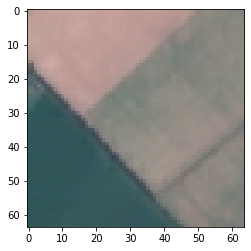

In [5]:
#Checking the images.
print(len(img), len(lbl))
import matplotlib.pyplot as plt
print("label[27]:",lbl[27])
plt.imshow(img[27])
print("x:",x.shape)
print("img[27]:",img[27].shape)
print("X[27]:",x[27].shape)
print("y[27]", y[27])

In [6]:
def one_hot_matrix(labels, classes):
  C = tf.constant(classes, name = 'C')

  oneHotMatrix = tf.one_hot(labels, C, axis = 0)

  with tf.Session() as sess:
    one_hot = sess.run(oneHotMatrix)

  return one_hot  

In [ ]:
#Testing the one_hot_matrix function
one_hot = one_hot_matrix([1,2,0,9,4,5,6,7,2,3], 10)
print(one_hot)
print('**', one_hot.shape)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
** (10, 10)


In [7]:
print(y.T.shape)
yhot = y.T.reshape(27000)
print(y[0])
print(yhot[ 0:9])
yhot = one_hot_matrix(yhot, 10).T
print(yhot.shape)
print(yhot[:,0])


(1, 27000)
[4.]
[4. 8. 8. 8. 9. 1. 2. 4. 8.]
(27000, 10)
[0. 0. 0. ... 1. 0. 0.]


In [8]:
#one hot labels.
Y = yhot 

#Dividing the examples in train and test sets.
X_train = x[0:24300, :, :, :]
Y_train = yhot[0:24300, :]
X_test = x[24300 : , :, :, :]
Y_test = yhot[24300 : , :]

#Normalizing train and test sets.
X_train = X_train/255
X_test = X_test/255
print("Number of training examples:",X_train.shape[0])
print("Number of test examples: ",X_test.shape[0])
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Number of training examples: 24300
Number of test examples:  2700
X_train shape: (24300, 64, 64, 3)
Y_train shape: (24300, 10)
X_test shape: (2700, 64, 64, 3)
Y_test shape: (2700, 10)


In [9]:
def create_placeholders(nH0, nW0, nC0, ny):
  #nH0: Height of the input image.
  #nW0: Width of the input image.
  #nC0: Number of channels of input.
  #ny : Number of classes.
  
  #X for image inputs and Y for labels.
  X = tf.placeholder(tf.float32, shape = (None, nH0, nW0, nC0))
  Y = tf.placeholder(tf.float32, shape = (None, ny))

  return X, Y



In [10]:
def initialize_parameters():
  #Returns parameters initialized in a dictionary named parameters.
  
  tf.set_random_seed(1) 
  
  W1 = tf.get_variable('W1', [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed=0) )
  W2 = tf.get_variable('W2', [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed=0))

  parameters = {'W1' : W1, 'W2' : W2}

  return parameters

In [ ]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1[1,1,1] = \n" + str(parameters["W1"].eval()[1,1,1]))
    print("W1.shape: " + str(parameters["W1"].shape))
    print("\n")
    print("W2[1,1,1] = \n" + str(parameters["W2"].eval()[1,1,1]))
    print("W2.shape: " + str(parameters["W2"].shape))

W1[1,1,1] = 
[ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W1.shape: (4, 4, 3, 8)


W2[1,1,1] = 
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]
W2.shape: (2, 2, 8, 16)


In [11]:
def forward_propagation(X, parameters):

  W1 = parameters['W1']
  W2 = parameters['W2']
  
  #Convolutional Layer.
  Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
  A1 = tf.nn.relu(Z1)

  #Max Pool Layer.
  P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')

  #Convolutional Layer.
  Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
  A2 = tf.nn.relu(Z2)

  #Max Pool Layer.
  P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')

  #Flattening P2
  F = tf.contrib.layers.flatten(P2)
  
  #Fully Connected Layer.
  Z3 = tf.contrib.layers.fully_connected(F, 10, activation_fn = None)
  
  return Z3


In [12]:
def computeCost(Z3, Y):
  # Returns the cost
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))

  return cost
  



In [13]:
def randomMiniBatches(X, Y, miniBatchSize, seed):
  np.random.seed(seed)
  m = X.shape[0]
  miniBatches = list()#List of all mini batches.

  #Shuffling the examples.
  permutation = list(np.random.permutation(m))
  shuffled_X = X[permutation, :]
  shuffled_Y = Y[permutation, :]
  
  #Total complete mini batches.
  numOfCompleteMiniBatches = int( m/miniBatchSize )
  #Computing the mini batches.
  for k in range(0, numOfCompleteMiniBatches):
    miniBatch_X = shuffled_X[ k*miniBatchSize : (k+1)*miniBatchSize, :]
    miniBatch_Y = shuffled_Y[ k*miniBatchSize : (k+1)*miniBatchSize, :]

    miniBatch = (miniBatch_X, miniBatch_Y)
    miniBatches.append(miniBatch)
    
    #For the last incomplete miniBatch.
    if m % miniBatchSize != 0:
      miniBatch_X = shuffled_X[ miniBatchSize : numOfCompleteMiniBatches, : ]
      miniBatch_Y = shuffled_Y[ miniBatchSize : numOfCompleteMiniBatches, : ]

      miniBatch = (miniBatch_X, miniBatch_Y)
      miniBatches.append(miniBatch)
    

  return miniBatches





In [ ]:
miniBatches = randomMiniBatches(X_train, Y_train, 64, 0)

print("Shape of mini batch 0: ", miniBatches[0][0].shape)

**** (24300, 10) 
 (24300, 64, 64, 3)
Shape of mini batch 0:  (64, 64, 64, 3)


In [14]:
def model(X_train, Y_train, X_test, Y_test, learningRate = 0.009, numOfEpochs = 50, miniBatchSize = 64):
  
  tf.reset_default_graph()
  tf.set_random_seed(1)
  seed = 3
  costs = list()
  #m is the number of training examples.
  #nH0 is the height of input image.
  #nW0 is the width of input image.
  #nC0 is the number of channels of the input image.
  #ny is the number of classes i.e 10
  (m, nH0, nW0, nC0) = X_train.shape
  ny = Y_train.shape[1]


  #Creating placeholders.
  X, Y = create_placeholders(nH0, nW0, nC0, ny)

  #Initializing parameters.
  parameters = initialize_parameters()

  #Adding forward propagation to the tensorflow graph.
  Z3 = forward_propagation(X, parameters)

  #Adding a function to compute the cost in the tensorflow graph.
  cost = computeCost(Z3, Y)

  #Defining the optimizer for back propagation.
  optimizer = tf.train.AdamOptimizer(learning_rate= learningRate).minimize(cost)

  init = tf.global_variables_initializer()

  with tf.Session() as sess:
    sess.run(init)

    for epoch in range(numOfEpochs):
      #
      miniBatchCost = 0.
      numOfMiniBatches = int(m/miniBatchSize)
      seed += 1

      miniBatches = randomMiniBatches(X_train, Y_train, miniBatchSize, seed) 
    
      for miniBatch in miniBatches:
        #
        (miniBatch_X, miniBatch_Y) = miniBatch

        _, tempCost = sess.run([optimizer, cost], feed_dict = {X: miniBatch_X, Y: miniBatch_Y})
        miniBatchCost = tempCost/numOfMiniBatches

      print ("Cost after epoch %i: %f" % (epoch, miniBatchCost))
      costs.append(miniBatchCost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learningRate))
    plt.show()

    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)





  return train_accuracy, test_accuracy, parameters


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Cost after epoch 0: 0.001333
Cost after epoch 1: 0.001219
Cost after epoch 2: 0.001017
Cost after epoch 3: 0.000894
Cost after epoch 4: 0.001028
Cost after epoch 5: 0.000616
Cost after epoch 6: 0.000589
Cost after epoch 7: 0.000541
Cost after epoch 8: 0.000724
Cost after epoch 9: 0.000538
Cost after epoch 10: 0.000828
Cost after epoch 11: 0.000549
Cost after epoch 12: 0.000581
Cost after epoch 13: 0.000697
Cost after epoch 14: 0.000310
Cost after epoch 15: 0.000566
Cost after epoch 16: 0.000409
Cost after epoch 17: 0.000452
Cost after epoch 18: 0.000486
Cost after epoch 19: 0.000409
Cost after epoch 20: 0.000294
Cost after epoch 21: 0.000406
Cost after epoch 22: 0.000712
Cost after epoch 23: 0.000416
Cost after epoch 24: 0.000425
Cost after epoch 25: 0.000451
Cost after epoch 26: 0.000305
Cost after epoch 27: 0.000424
Cost after epoch 28: 0.000312
Cost after epoch 29: 0.000348
Cost after epoch 30: 0.000224
Cost after epoch 31: 0.000406
Cost after epoch 32: 0.000350
Cost after epoch 33:

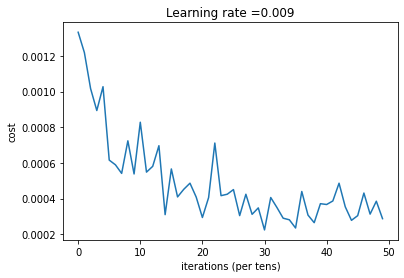

Tensor("Mean_1:0", shape=(), dtype=float32)


In [ ]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)